## In this notebook we will:

- Explore the base CFBP data
- we will see the distribution of complaints per product types
- we will filter complaints with these product types:
    - Credit card
    - Personal loan
    - Personal loan
    - Buy Now, Pay Later (BNPL)
    - Savings account
    - Money transfers
- then from the above product types we will filter complaints without narratives (empty complaints)
- then clean complaint text naratives to imporve embeding quality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import unicodedata

import sys 
import os


sys.path.append(os.path.abspath("../src"))
from utils.utils import (normalize_for_rag, 
                         plot_word_count_distribution, 
                         plot_complaint_distribution, 
                         load_data)


## Load the Data

In [9]:
# load the data 

data = load_data("../data/raw/complaints.csv")
print("Data Loaded Successfully✅")

C:\Users\adoni\AppData\Local\Temp\ipykernel_20560\1221360855.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv("../data/raw/complaints.csv")


Data Loaded Successfully✅


# Initial EDA

In [15]:
# data shape
data.shape

(9609797, 18)

In [11]:
# look at the columns
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [16]:
# data types of each column 
data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [17]:
data["Date received"] = pd.to_datetime(data["Date received"])
print(data["Date received"].dtype)
print("successfully converted to datetime✅")

datetime64[ns]
successfully converted to datetime✅


In [12]:
# look at the top 5 rows
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [14]:
# look at unique products
data.Product.unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt or credit management', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Money transfers', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [21]:
# Analyse complaint distributtion per product
complaint_per_product = data["Product"].value_counts().sort_values(ascending=False)
complaint_per_product

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

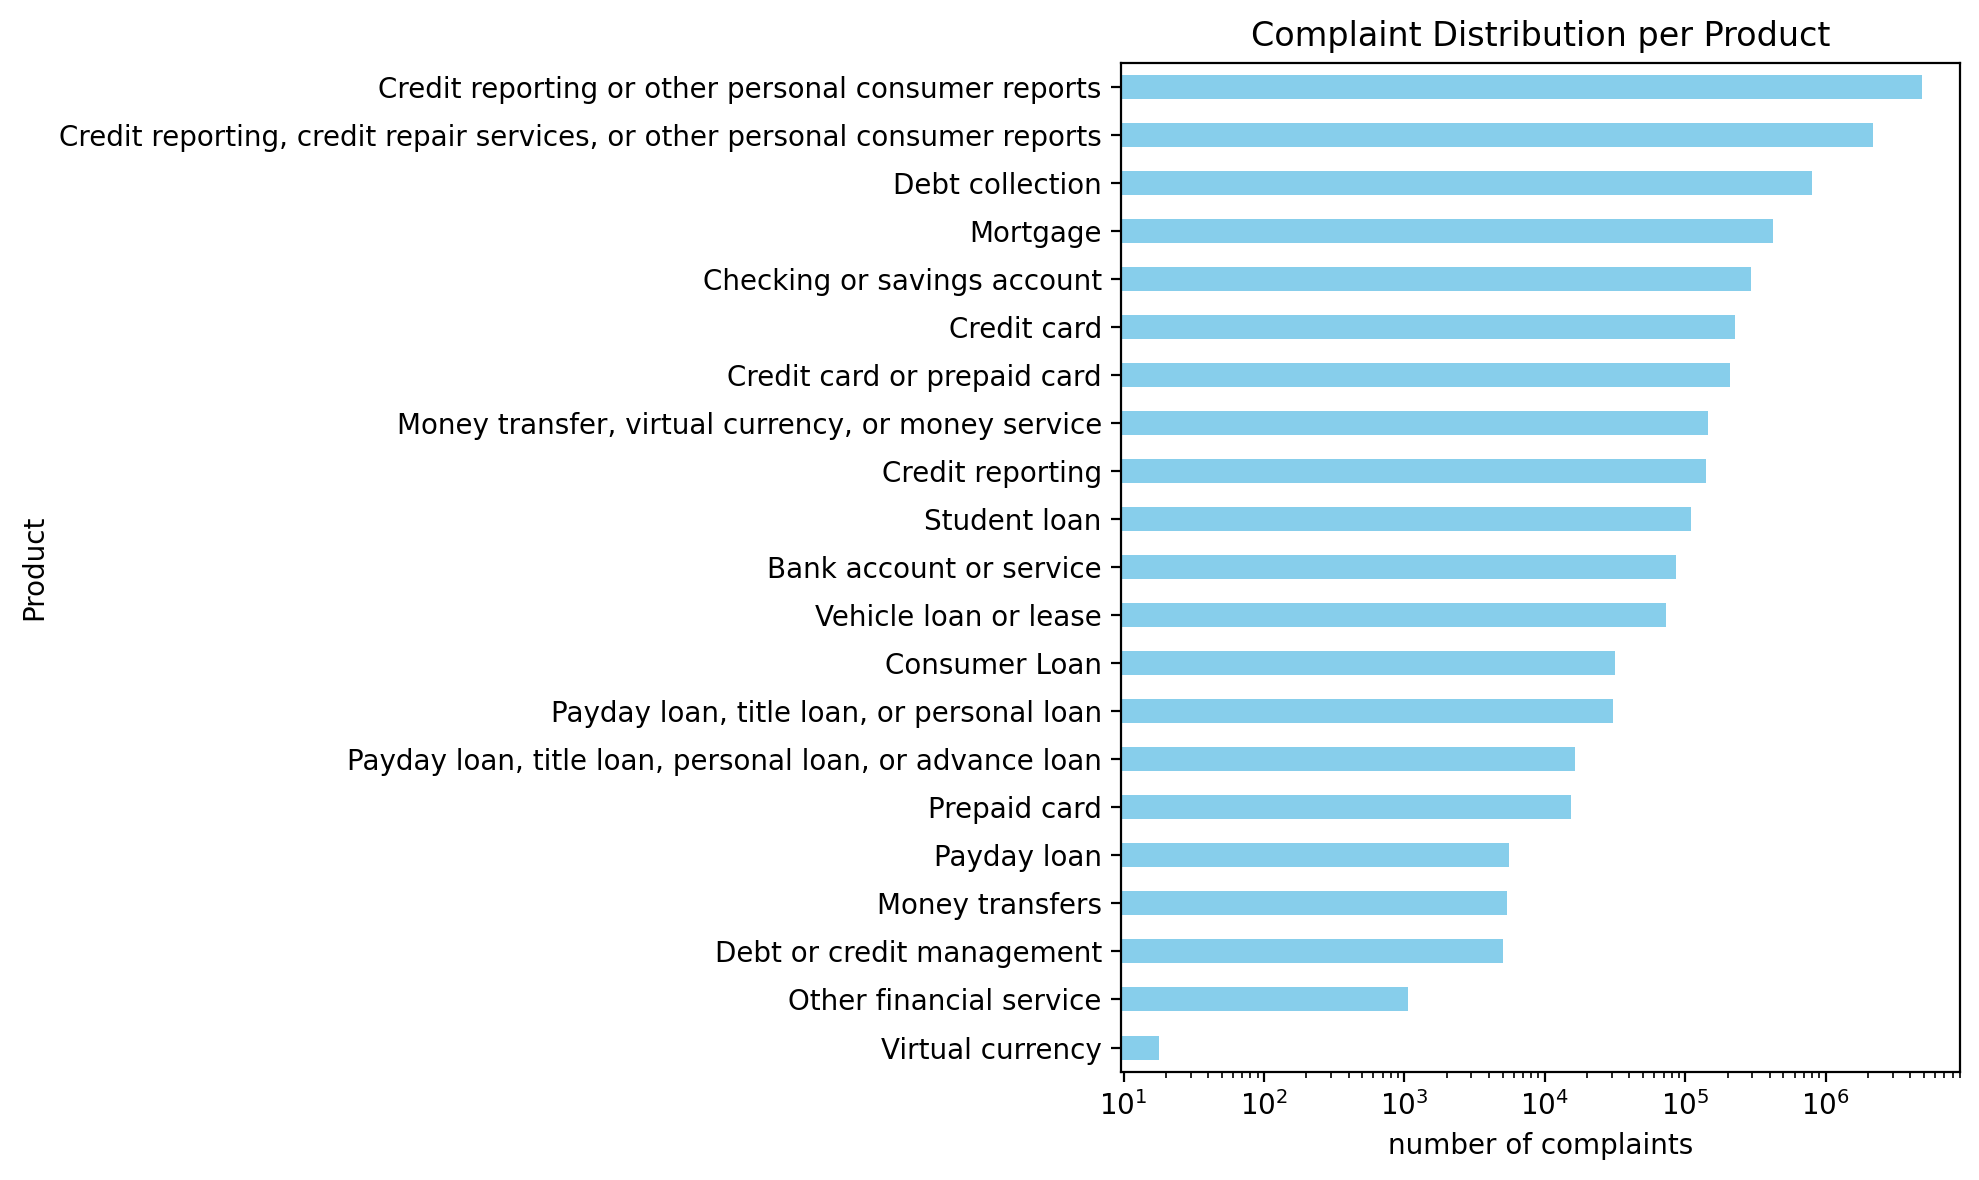

In [ ]:
# visualize complaint distribution per product
plot_complaint_distribution(complaint_per_product)

In [29]:
# claculate the word count of complaint naratives and store them in a new column
data["word_count"] = data["Consumer complaint narrative"].fillna("").apply(lambda x: len(x.split()))
print("word count calculated✅")
data["word_count"]

word count calculated✅


0          0
1          0
2          0
3          0
4          0
          ..
9609792    0
9609793    0
9609794    0
9609795    0
9609796    0
Name: word_count, Length: 9609797, dtype: int64

In [30]:
#summary statistics of the word count of complaint naratives
data["word_count"].describe()

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: word_count, dtype: float64

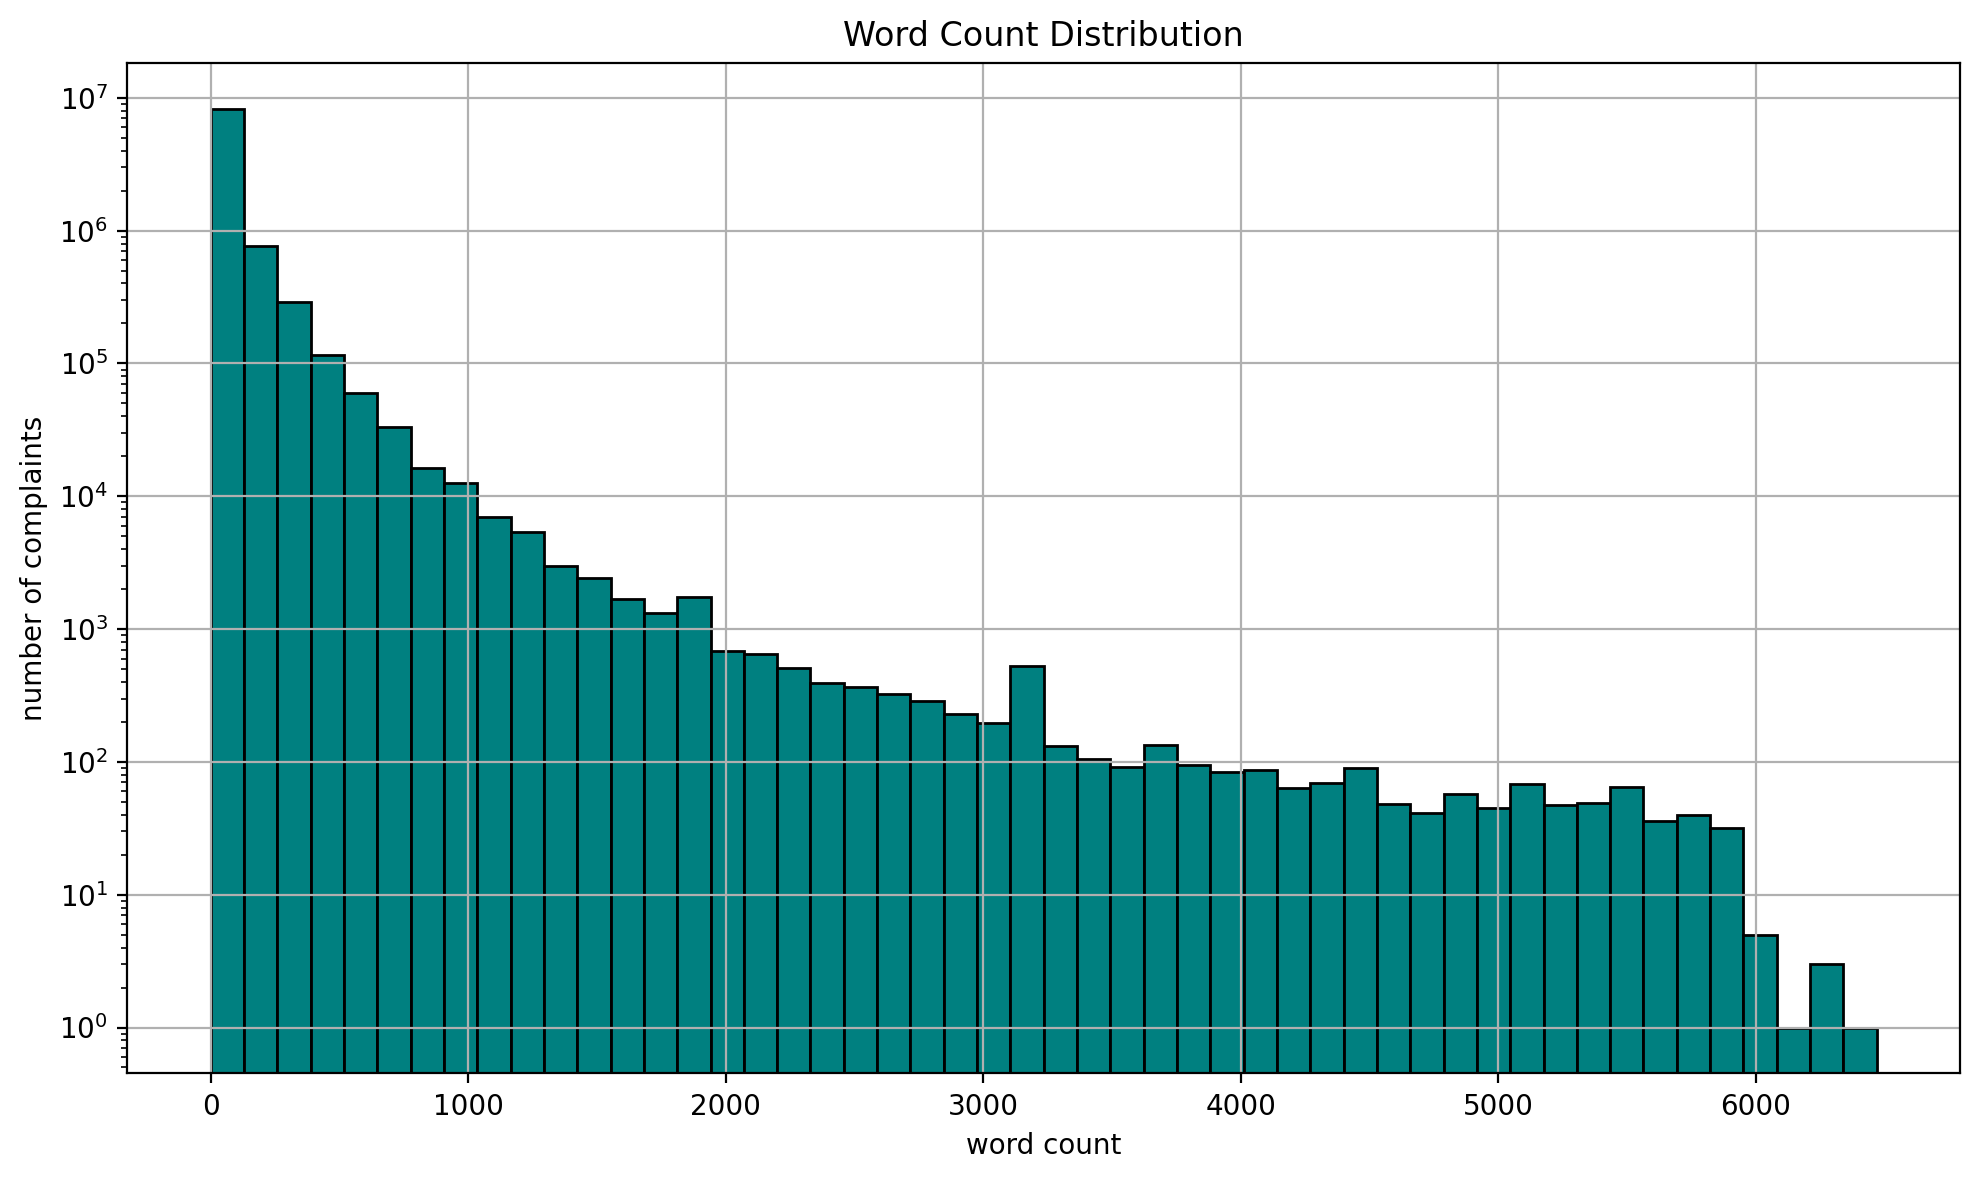

In [47]:
# visualize word count distribution
plot_word_count_distribution(data["word_count"])

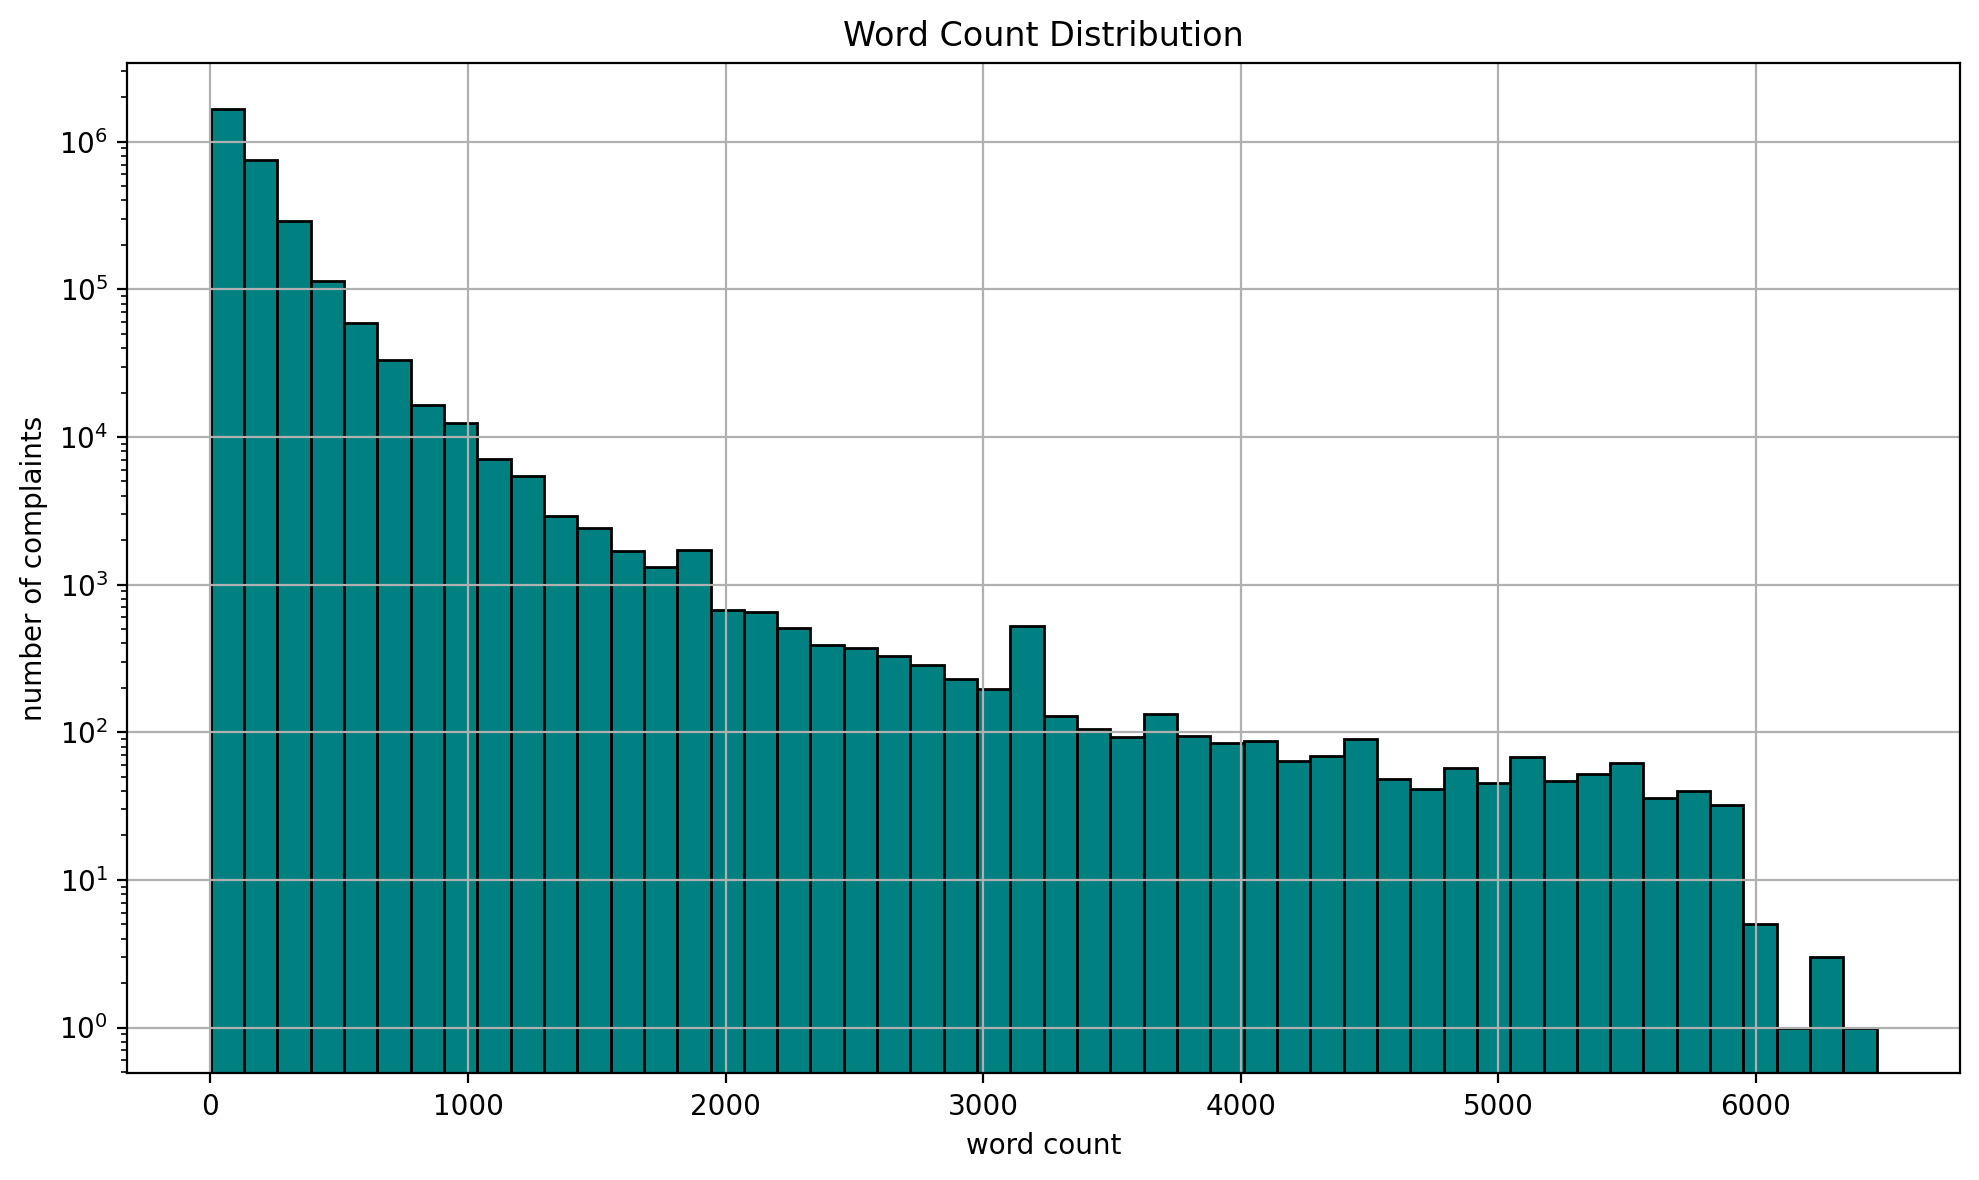

In [48]:
# distribution of word count for complaints with more than 0 words or are not null
plot_word_count_distribution(data[data["word_count"] > 0]["word_count"])

In [34]:
# the number of complaint without naratives
print((data[data["word_count"] == 0].shape)[0])

# or 
print(data["Consumer complaint narrative"].isna().sum())


6629041
6629041


# Filter Data to meet project Requirement

### In the filtering process, we will filter the dataset to include only the 5 products we are interested in 
here are the products and thir chosen proxies:
- Credit card → Credit card
- Personal loan → Consumer Loan
- Buy Now, Pay Later (BNPL) → Advance loan
- Savings account → Checking or savings account
- Money transfers → Money transfer, virtual currency, or money service

Note: although we lacked any true labels which directly corelate to a BNPL product we chose the Advance loan lable sinc, It’s the only label that implies a small, short-term advance you repay in a handful of installments—just like buy-now-pay-later plans.






In [39]:
# original distribution of complaint for reference
data.Product.value_counts()

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

In [37]:
# filter dataset based on choosen proxies
chosen_proxies = [
    "Credit card",
    "Consumer Loan",
    "Payday loan, title loan, personal loan, or advance loan",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]

filtered_data = data[data["Product"].isin(chosen_proxies)].copy()

# Map to our five target buckets

proxy_map = {
    "Credit card": "Credit card",
    "Consumer Loan": "Personal loan",
    "Payday loan, title loan, personal loan, or advance loan": "BNPL",
    "Checking or savings account": "Savings account",
    "Money transfer, virtual currency, or money service": "Money transfers"
}

filtered_data["Target_Product"] = filtered_data["Product"].map(proxy_map)

# confirm unique entries of product catagories with complaint count(both null and actual complaints) not filtered yet
print(filtered_data["Product"].nunique())

# check the shape of the new dataset
print(filtered_data.shape)


5
(711018, 20)


In [38]:
# the count of each categotry of product
filtered_data["Product"].value_counts()

Product
Checking or savings account                                291178
Credit card                                                226686
Money transfer, virtual currency, or money service         145066
Consumer Loan                                               31574
Payday loan, title loan, personal loan, or advance loan     16514
Name: count, dtype: int64

In [42]:
# complaints without any narative 
filtered_data["Consumer complaint narrative"].isna().sum()

np.int64(374487)

In [43]:
# remove complaints without any complaint narrative
filtered_data = filtered_data.dropna(subset=["Consumer complaint narrative"])
print(filtered_data.shape)

(336531, 20)


Product
Checking or savings account                                140319
Money transfer, virtual currency, or money service          97188
Credit card                                                 80667
Consumer Loan                                                9461
Payday loan, title loan, personal loan, or advance loan      8896
Name: count, dtype: int64


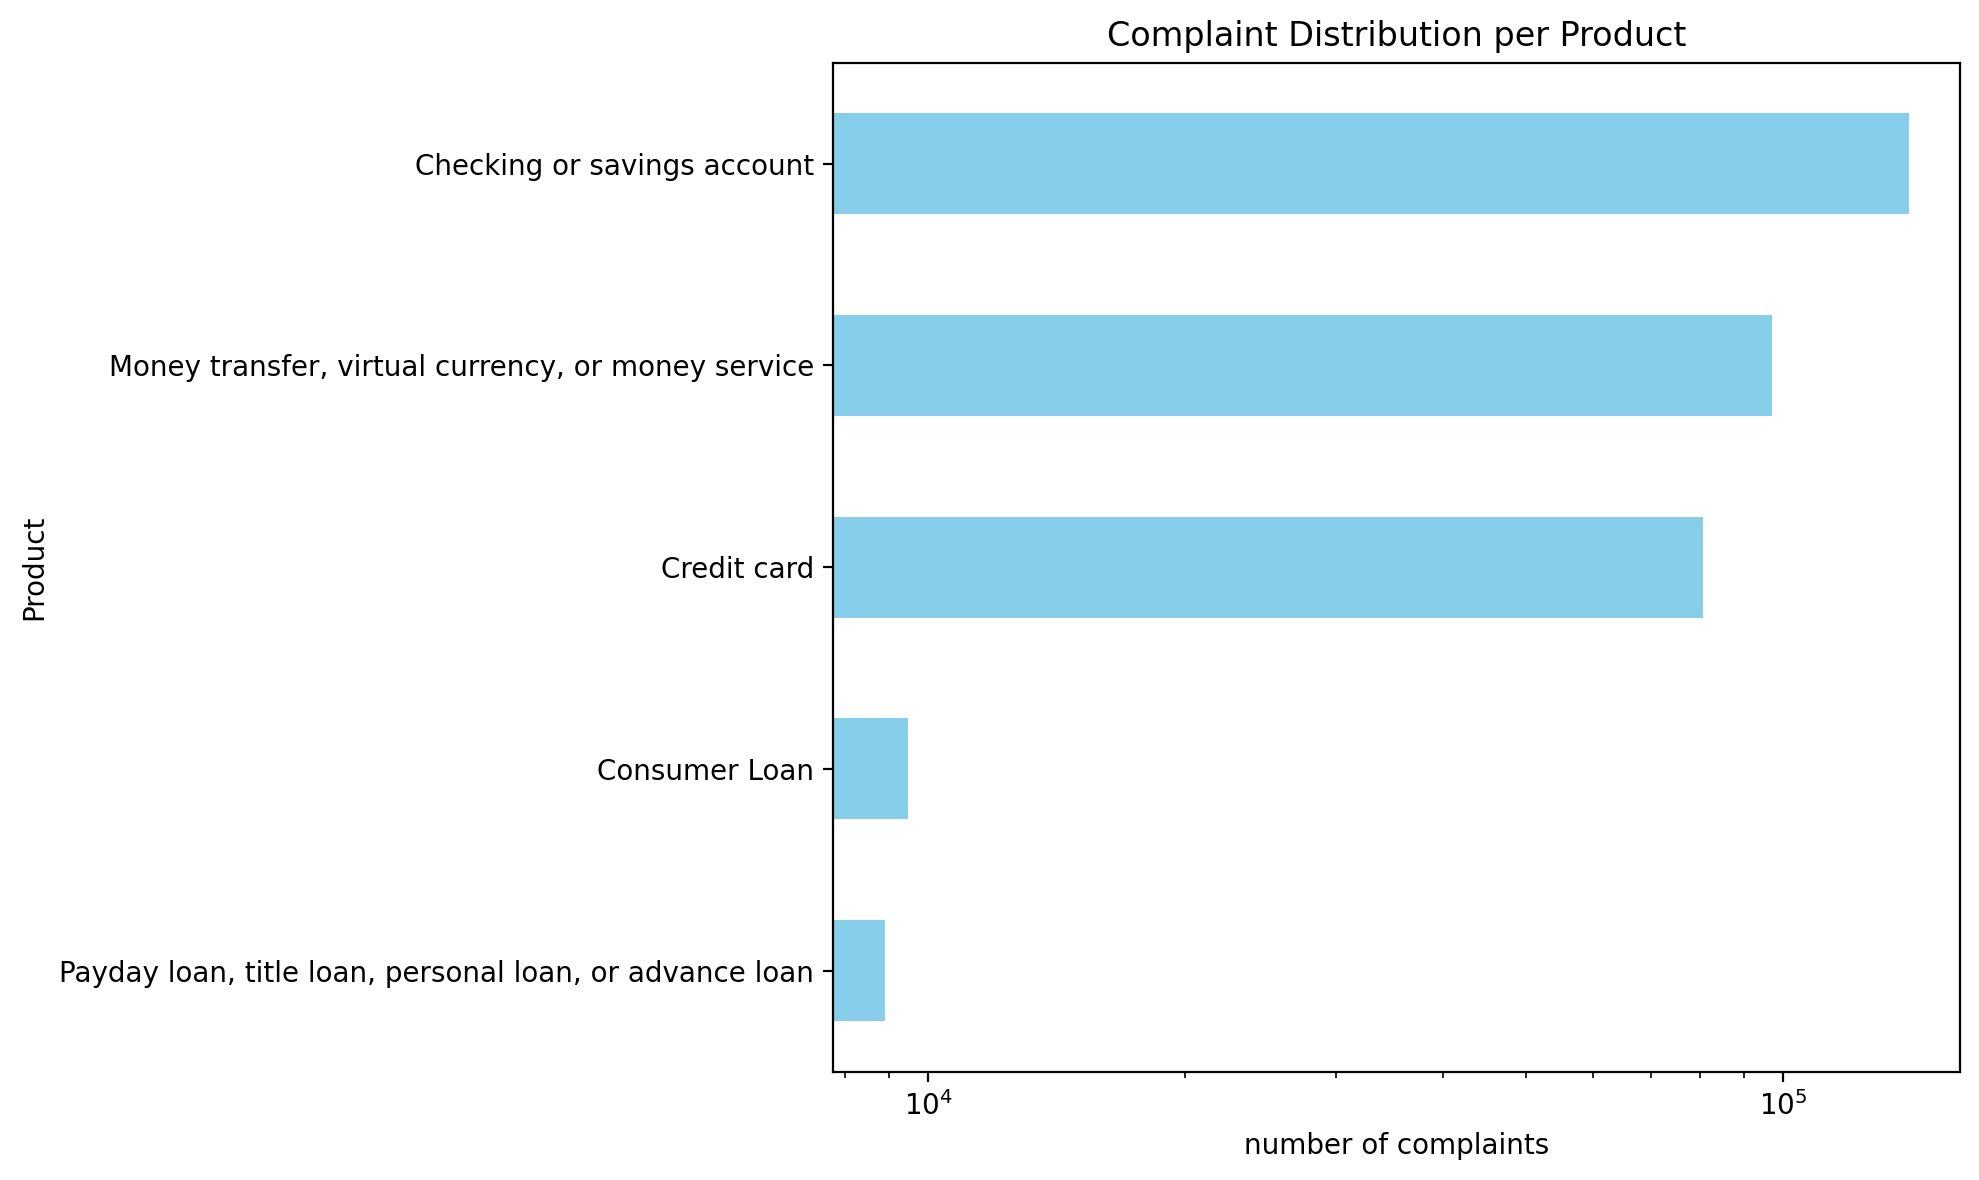

In [44]:
# lets visualize the complaint distribution per product
filtered_complaint_per_product = filtered_data["Product"].value_counts().sort_values(ascending=False)
print(filtered_complaint_per_product)

plot_complaint_distribution(filtered_complaint_per_product)

In [45]:
# statistical summary of word count distributoin of cleaned data
filtered_data["word_count"].describe()

count    336531.000000
mean        199.132606
std         225.384983
min           1.000000
25%          81.000000
50%         126.000000
75%         245.000000
max        6469.000000
Name: word_count, dtype: float64

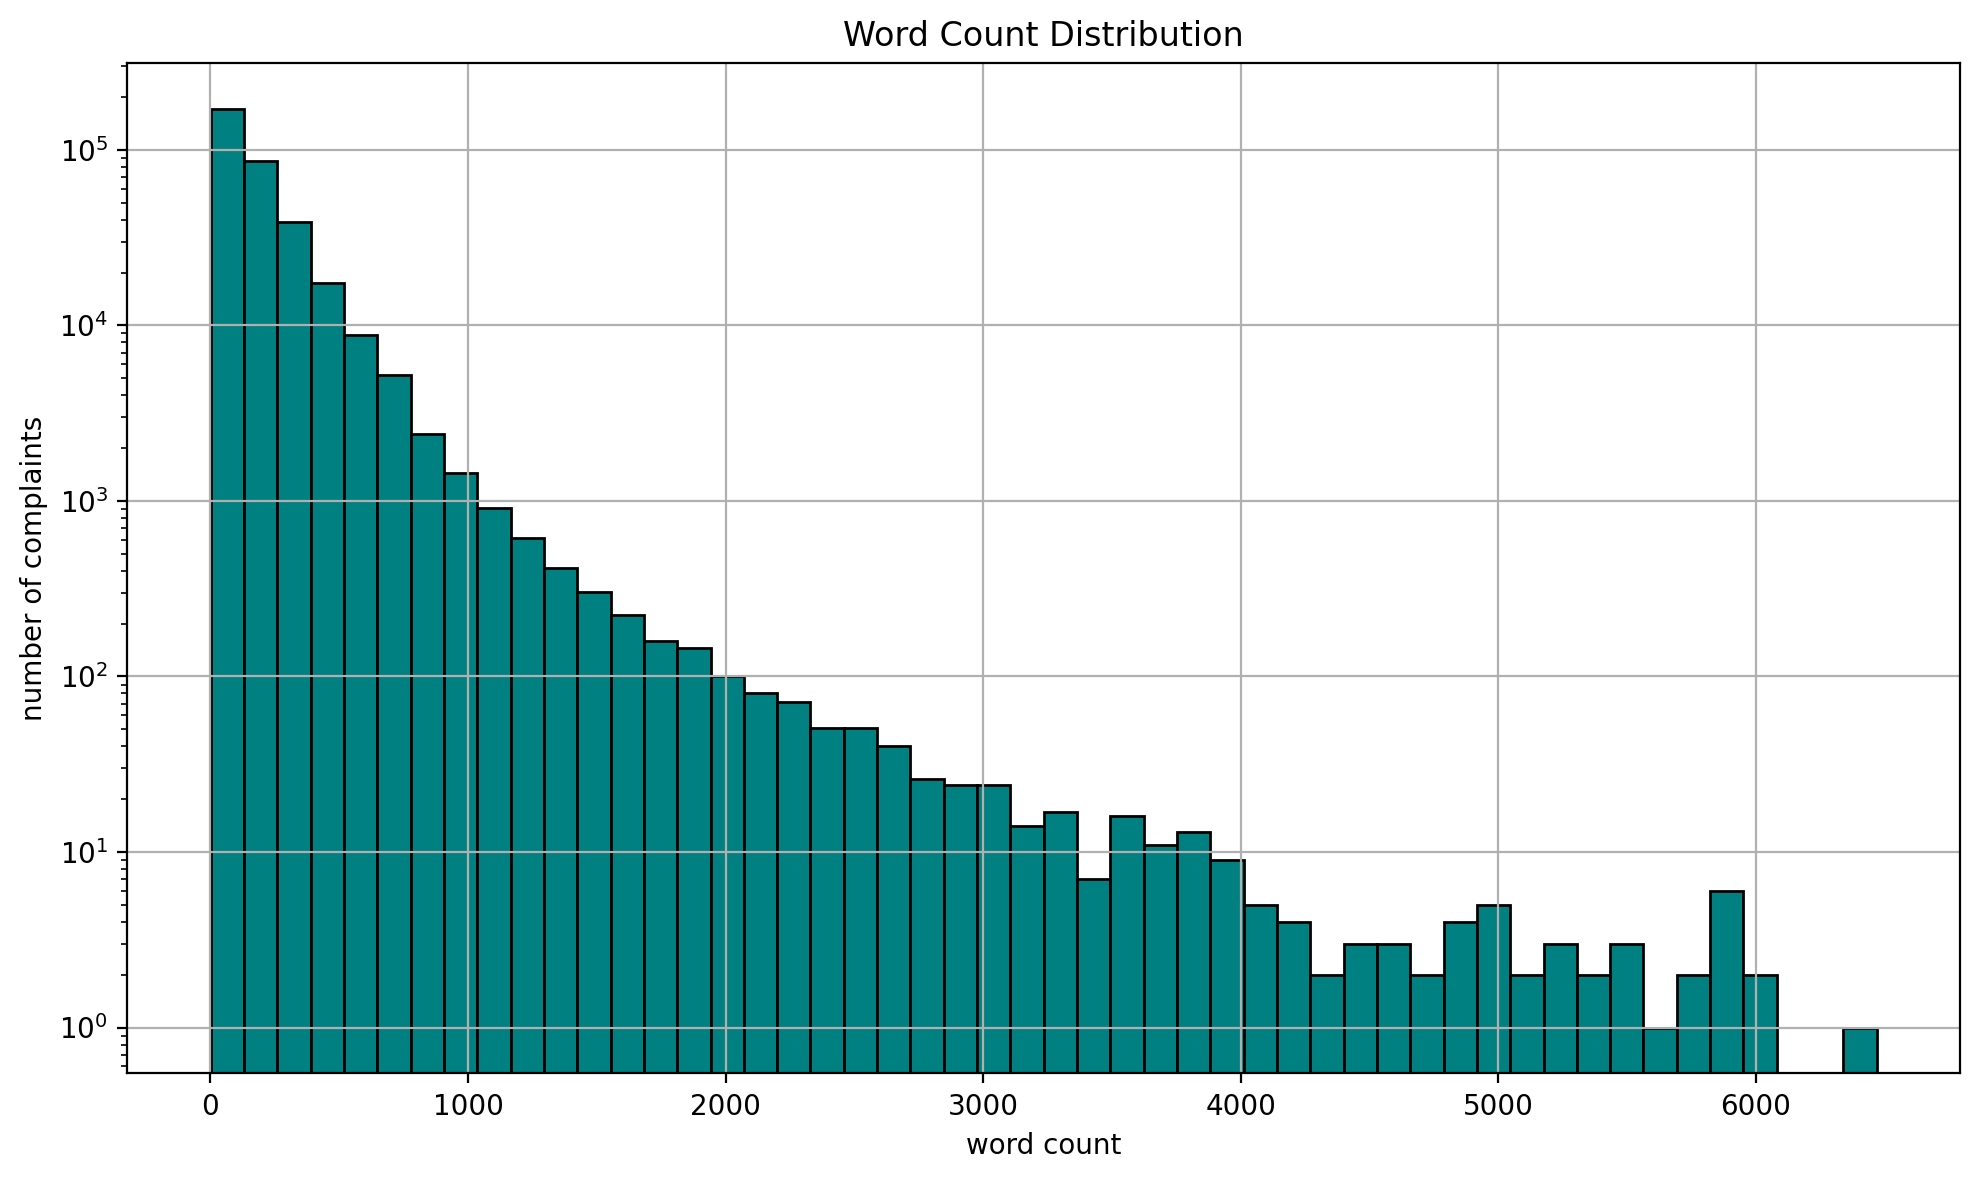

In [49]:
# visualize complaint word count distribution per product
plot_word_count_distribution(filtered_data["word_count"])

# Clean text narative to imporve embeding quality

In [87]:
filtered_data["Normalized Consumer complaint narrative"] = filtered_data["Consumer complaint narrative"].apply(normalize_for_rag)
print("normalized text naratives✅")

normalized text naratives✅


In [82]:
#check if the normalization worked
filtered_data[["Consumer complaint narrative", "Normalized Consumer complaint narrative"]].head(10)

,Consumer complaint narrative,Normalized Consumer complaint narrative
12237,A XXXX XXXX card was opened under my name by a...,a card was opened under my name by a fraudster...
12532,I made the mistake of using my wellsfargo debi...,i made the mistake of using my wellsfargo debi...
13280,"Dear CFPB, I have a secured credit card with c...","dear cfpb, i have a secured credit card with c..."
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards. the credit balanc...
13955,b'I am writing to dispute the following charge...,b'i am writing to dispute the following charge...
14249,"Although the account had been deemed closed, I...","although the account had been deemed closed, i..."
14562,Got locked out of my account because I was try...,got locked out of my account because i was try...
14591,I was trying to log into my account and it wou...,i was trying to log into my account and it wou...
15740,I received an email in XXXX from my XXXX XXXX ...,i received an email in from my saying that i w...
16239,under Idaho state law28-46-413. PAYDAY LOAN BU...,under idaho state law28-46-413. payday loan bu...


In [76]:
filtered_data["Consumer complaint narrative"].str.contains(r"\$", na=False).sum()


np.int64(138210)

In [83]:
filtered_data["Normalized Consumer complaint narrative"].str.contains(r"\$", na=False).sum()

np.int64(138210)

In [ ]:
#save the filtered normalized data
# in csv format
filtered_data.to_csv("../data/processed/filtered_complaints.csv", index=False)
# in parquet format
filtered_data.to_parquet("../data/processed/filtered_complaints.parquet", engine="pyarrow", index=False)

In [85]:
# check few elements of the normalized text
filtered_data["Normalized Consumer complaint narrative"][:5].values

array(['a card was opened under my name by a fraudster. i received a notice from that an account was just opened under my name. i reached out to to state that this activity was unauthorized and not me. confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by that was done by a fraudster.',
       "i made the mistake of using my wellsfargo debit card to depsit funds into atm machine outside their branch. i went into the branch and was told they couldn't help and had to phone the customer service for help. i did this and was told i was helped gave all the info for the time terminal id aact s, was able to find the transaction and give me this info, he said the dispute would take a few days. i waited a few days and got a letter stating my dispute was rejected. i went back into and they said they never got the transaction.",
      

# EDA and Data Preprocessing Summary

## 1. Data Exploration

- **Dataset**: The analysis uses the CFPB complaints dataset loaded from `../data/raw/complaints.csv`.
- **Initial Checks**:
  - Inspected the shape and columns of the dataset.
  - Converted the "Date received" column to datetime format.
  - Displayed the first few rows and unique product types.

## 2. Complaint Distribution

- **Product Types**: The dataset contains complaints across various financial products.
- **Distribution**: The number of complaints per product was calculated and visualized, revealing which products receive the most complaints.

## 3. Complaint Narratives

- **Word Count**: Calculated the word count for each complaint narrative and added it as a new column.
- **Statistics**: Generated summary statistics for word counts.
- **Visualization**: Plotted the distribution of word counts for all complaints and for those with non-empty narratives.
- **Missing Narratives**: Identified the number of complaints without narratives (either empty or NaN).

## 4. Filtering for Project Requirements

- **Target Products**: Focused on five product categories, using proxies where necessary:
  - Credit card
  - Personal loan (proxy: Consumer Loan)
  - Buy Now, Pay Later (BNPL) (proxy: Payday loan, title loan, personal loan, or advance loan)
  - Savings account (proxy: Checking or savings account)
  - Money transfers (proxy: Money transfer, virtual currency, or money service)
- **Filtering**: Filtered the dataset to include only these products and mapped them to the target categories.
- **Distribution Check**: Checked the distribution of complaints in the filtered dataset.
- **Missing Narratives**: Counted and removed complaints without narratives.

## 5. Cleaned Data Analysis

- **Complaint Distribution**: Visualized the distribution of complaints per product in the filtered and cleaned dataset.
- **Word Count**: Provided summary statistics and visualizations for word counts in the cleaned data.

## 6. Text Normalization

- **Normalization**: Applied a text normalization function to the complaint narratives to improve embedding quality.
- **Verification**: Checked that normalization was successful by comparing original and normalized texts and searching for specific characters (e.g., `$`).

## 7. Data Export

- **Saving Data**: Saved the filtered and normalized dataset in both CSV and Parquet formats for future use.

---

## Key Findings

- The majority of complaints are concentrated in a few product categories.
- A significant portion of complaints lack narratives and were removed for further analysis.
- The word count of complaint narratives varies widely, with most complaints being relatively short.
- After filtering and cleaning, the dataset is focused on five key product categories relevant to the project.
- Text normalization was successfully applied to improve the quality of downstream text analysis.
